# Environment Setup

In [1]:
# Check who is the user running Jupyter.
who_am_i = !whoami

# Define our data base path.
base_path_data = '../input' if who_am_i[0] == 'root' else '../../data'

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(base_path_data))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'gender_submission.csv']


# Data Set Preparation

In [3]:
df_raw = pd.read_csv(base_path_data + '/train.csv', sep=",", header=0, encoding='utf-8')
df_test_raw = pd.read_csv(base_path_data + '/test.csv', sep=",", header=0, encoding='utf-8')

# Statistics

In [4]:
print(df_raw.describe())
print(df_raw.dtypes)
df_raw.loc[:5,]

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      int64
Survived         int64
Pclass           int64
Name        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [5]:
# Columns to keep.
features = 'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked'.split(',')

# Imputation of Missing Values

In [15]:
from sklearn.preprocessing import Imputer

print(df_raw.isnull().any())

# Keep the features we can imput.
df_raw_2 = df_raw.loc[:, ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
df_test_raw_2 = df_test_raw.loc[:, ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# print(df_raw_2.dtypes)
imp = Imputer(missing_values=np.nan, strategy='most_frequent', axis=0)
imp.fit(df_raw_2)

df_raw_no_na = pd.DataFrame(imp.transform(df_raw_2))
df_raw_no_na.columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

imp.fit(df_test_raw_2)

df_test_raw_no_na = pd.DataFrame(imp.transform(df_test_raw_2))
df_test_raw_no_na.columns = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

print(df_raw_2.isna().any())


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
PassengerId    False
Survived       False
Pclass         False
Age             True
SibSp          False
Parch          False
Fare           False
dtype: bool


/Users/hujol/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [193]:
# Get rid of the observations for which one of the features has NA as value.
# df_raw_no_na = df_raw_2.dropna(axis=0, subset=features)
# df_test_raw_no_na = df_test_raw.dropna(axis=0, subset='PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked'.split(','))

In [16]:
# Data Types.
df_raw_no_na.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Age            float64
SibSp          float64
Parch          float64
Fare           float64
dtype: object

In [18]:
{'Survived':df_raw_no_na.query('Survived == 1').count()[0], 'Did not':df_raw_no_na.query('Survived == 0').count()[0]}

{'Survived': 342, 'Did not': 549}

In [19]:
# Check people age under 1.
df_raw_no_na.query('Age < 1')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
78,79.0,1.0,2.0,0.83,0.0,2.0,29.0000
305,306.0,1.0,1.0,0.92,1.0,2.0,151.5500
469,470.0,1.0,3.0,0.75,2.0,1.0,19.2583
644,645.0,1.0,3.0,0.75,2.0,1.0,19.2583
755,756.0,1.0,2.0,0.67,1.0,1.0,14.5000
803,804.0,1.0,3.0,0.42,0.0,1.0,8.5167
831,832.0,1.0,2.0,0.83,1.0,1.0,18.7500


In [20]:
# Group by age and count to see the distribution.
age_2_count = df_raw_no_na.groupby('Age')['PassengerId'].count().reset_index(name="Count")
age_2_count.loc[:5,]

,Age,Count
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1
5,1.00,7


# Visualization of Data

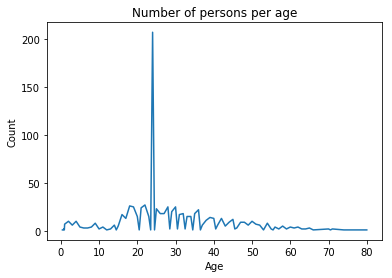

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# Use the binary classifier on all data.
Xs = age_2_count.loc[:,'Age']
Ys = age_2_count.loc[:,'Count']
plt.plot(Xs, Ys)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of persons per age')
plt.show()

# Classification with Random Tree Forrest

In [22]:
from sklearn import tree

features_clf = 'Pclass,Age,SibSp,Parch,Fare'.split(',')
X = df_raw_no_na.loc[:, features_clf]
Y = df_raw_no_na.loc[:, 'Survived']
clf = tree.DecisionTreeClassifier()
clf_model = clf.fit(X, Y)

In [23]:
# Run prediction on the training data set.
X_prediction = clf_model.predict(X)

# Print some results.
print(X_prediction[:10])

[0. 1. 1. 1. 0. 0. 0. 0. 1. 1.]


# Evaluation of the Model

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

score = accuracy_score(Y, X_prediction, normalize=True)

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y, X_prediction)
tn, fp, fn, tp = cnf_matrix.ravel()

# Print features importance.
print(np.array(list(zip(features_clf, clf_model.feature_importances_))))

# Show confusion matrix.
print(tn, fp, fn, tp)
print(score)
print(cnf_matrix)

[['Pclass' '0.13120869139882488']
 ['Age' '0.3534946541640884']
 ['SibSp' '0.08717723517903722']
 ['Parch' '0.04461536235215727']
 ['Fare' '0.38350405690589223']]
543 6 35 307
0.9539842873176206
[[543   6]
 [ 35 307]]


In [27]:
X_test = df_test_raw_no_na.loc[:, 'Pclass,Age,SibSp,Parch,Fare'.split(',')]
X_test_predicted = clf_model.predict(X_test)

Confusion matrix, without normalization
[[543   6]
 [ 35 307]]
Normalized confusion matrix
[[0.99 0.01]
 [0.1  0.9 ]]


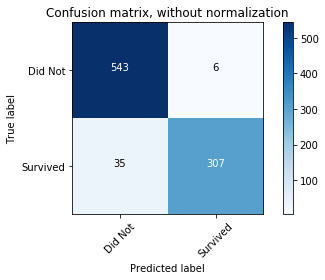

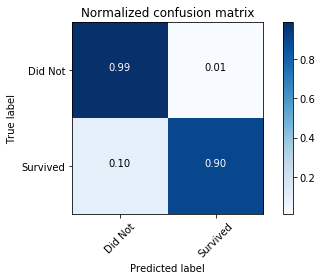

In [26]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
np.set_printoptions(precision=2)

class_names = ['Did Not', 'Survived']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# CSV of Test Data Set Prediction

In [40]:
df_to_submit = pd.DataFrame(list(zip(df_test_raw_no_na.loc[:,'PassengerId'], X_test_predicted)))
df_to_submit.columns = ['PassengerId','Survived']
df_to_submit.PassengerId = df_to_submit.PassengerId.astype(np.int32)
df_to_submit.Survived = df_to_submit.Survived.astype(np.int32)

df_to_submit.to_csv(base_path_data + '/csv_submission.csv', index=False)